In [1]:
import pandas as pd
import yfinance as yf
from datetime import timedelta
import pandas_ta as ta
from IPython.display import display


In [2]:
tickers = ['TSLA', 'RIVN', 'NVDA','AAPL']
years = 5

In [3]:
def data_download_daily(tickers, years):
    today = pd.Timestamp.today()
    days_in_years = 365*years
    start_date = (today - timedelta(days=days_in_years)).strftime('%Y-%m-%d')
    end_date = today
    days_in_years = 365*years
    prices_df = pd.DataFrame()
    for ticker in tickers:
        data = yf.download(ticker, start = start_date, end= end_date, interval='1D')
        prices_df[ticker] = data['Adj Close']
    return prices_df


In [4]:
prices_df = data_download_daily(tickers=tickers, years=years)
prices_df

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,TSLA,RIVN,NVDA,AAPL
Date,,,,
2019-03-12 00:00:00-04:00,18.890667,NaN,40.354061,43.540466
2019-03-13 00:00:00-04:00,19.264000,NaN,41.868702,43.733013
2019-03-14 00:00:00-04:00,19.330667,NaN,41.108894,44.219162
2019-03-15 00:00:00-04:00,18.362000,NaN,42.164177,44.794376
2019-03-18 00:00:00-04:00,17.966000,NaN,41.950645,45.251663
...,...,...,...,...
2024-03-04 00:00:00-05:00,188.139999,10.91,852.330017,175.100006
2024-03-05 00:00:00-05:00,180.740005,10.93,859.640015,170.119995
2024-03-06 00:00:00-05:00,176.539993,11.03,887.000000,169.119995


In [5]:
def calculate_my_strategy(input_df):
    strat = input_df.copy()
    for ticker in input_df.columns:
        strat[ticker + '_upper_50'] =   strat[ticker].rolling(window = 45).mean() + abs(strat[ticker].rolling(window = 90).mean())*0.5
        strat[ticker + '_lower_50'] =   strat[ticker].rolling(window = 45).mean() - abs(strat[ticker].rolling(window = 90).mean())*0.5
        strat[ticker + '_rolling_50'] = strat[ticker].rolling(window = 50).mean()
    return strat

In [6]:
my_strat = calculate_my_strategy(prices_df)


In [7]:
#input dataframe has to have tickers and column names whoch contain daily pices 
def calculate_donchian(prices_df):
    donchian_df = pd.DataFrame(index=prices_df.index)  # DataFrame to store Donchian channels
    for ticker in prices_df.columns:
        donchian_df[[f"{ticker}_dcl",f"{ticker}_dcm", f"{ticker}_dcu"]] = prices_df.ta.donchian(high = prices_df[ticker], low = prices_df[ticker], lower_length = 40, upper_length = 40)
        donchian_df[f'{ticker}_upper_dcu'] = donchian_df[f'{ticker}_dcu'] - (donchian_df[f'{ticker}_dcu'] - donchian_df[f'{ticker}_dcm'])*0.35
        donchian_df[f'{ticker}_lower_dcl'] = donchian_df[f'{ticker}_dcl'] + (donchian_df[f'{ticker}_dcm'] - donchian_df[f'{ticker}_dcl'])*0.35

    return donchian_df

In [8]:
donchian_df = calculate_donchian(prices_df)
donchian_df.tail(5)

,TSLA_dcl,TSLA_dcm,TSLA_dcu,TSLA_upper_dcu,TSLA_lower_dcl,RIVN_dcl,RIVN_dcm,RIVN_dcu,RIVN_upper_dcu,RIVN_lower_dcl,NVDA_dcl,NVDA_dcm,NVDA_dcu,NVDA_upper_dcu,NVDA_lower_dcl,AAPL_dcl,AAPL_dcm,AAPL_dcu,AAPL_upper_dcu,AAPL_lower_dcl
Date,,,,,,,,,,,,,,,,,,,,
2024-03-04 00:00:00-05:00,181.059998,210.754997,240.449997,230.056747,191.453247,10.07,14.825,19.580000,17.915750,11.73425,490.946960,671.638489,852.330017,789.087982,554.188995,175.100006,185.015633,194.931259,191.460790,178.570475
2024-03-05 00:00:00-05:00,180.740005,210.595001,240.449997,230.000748,191.189254,10.07,14.825,19.580000,17.915750,11.73425,522.505493,691.072754,859.640015,800.641473,581.504034,170.119995,182.525627,194.931259,190.589288,174.461966
2024-03-06 00:00:00-05:00,176.539993,205.750000,234.960007,224.736504,186.763496,10.07,14.660,19.250000,17.643500,11.67650,531.375122,709.187561,887.000000,824.765646,593.609476,169.119995,182.025627,194.931259,190.414288,173.636966
2024-03-07 00:00:00-05:00,176.539993,205.239998,233.940002,223.895001,186.584995,10.07,14.570,19.070000,17.495000,11.64500,543.474487,735.082245,926.690002,859.627287,610.537202,169.000000,181.965630,194.931259,190.393289,173.537970
2024-03-08 00:00:00-05:00,175.339996,201.279999,227.220001,218.141000,184.418997,10.07,14.430,18.790001,17.264001,11.59600,547.074341,736.882172,926.690002,860.257262,613.507082,169.000000,181.965630,194.931259,190.393289,173.537970


In [9]:
prices_df

,TSLA,RIVN,NVDA,AAPL
Date,,,,
2019-03-12 00:00:00-04:00,18.890667,NaN,40.354061,43.540466
2019-03-13 00:00:00-04:00,19.264000,NaN,41.868702,43.733013
2019-03-14 00:00:00-04:00,19.330667,NaN,41.108894,44.219162
2019-03-15 00:00:00-04:00,18.362000,NaN,42.164177,44.794376
2019-03-18 00:00:00-04:00,17.966000,NaN,41.950645,45.251663
...,...,...,...,...
2024-03-04 00:00:00-05:00,188.139999,10.91,852.330017,175.100006
2024-03-05 00:00:00-05:00,180.740005,10.93,859.640015,170.119995
2024-03-06 00:00:00-05:00,176.539993,11.03,887.000000,169.119995


In [10]:
def backtest(reference, ticker, trades):
    max_drawdown=0
    longest_hold=0
    shortest_hold=0
    average_drawdown=0
    max_gain=0
    total_gain= 0

My strategy

In [11]:
merge = pd.merge(prices_df, donchian_df, how='left', left_index=True, right_index=True)
merge

,TSLA,RIVN,NVDA,AAPL,TSLA_dcl,TSLA_dcm,TSLA_dcu,TSLA_upper_dcu,TSLA_lower_dcl,RIVN_dcl,...,NVDA_dcl,NVDA_dcm,NVDA_dcu,NVDA_upper_dcu,NVDA_lower_dcl,AAPL_dcl,AAPL_dcm,AAPL_dcu,AAPL_upper_dcu,AAPL_lower_dcl
Date,,,,,,,,,,,,,,,,,,,,,
2019-03-12 00:00:00-04:00,18.890667,NaN,40.354061,43.540466,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-13 00:00:00-04:00,19.264000,NaN,41.868702,43.733013,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-14 00:00:00-04:00,19.330667,NaN,41.108894,44.219162,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-15 00:00:00-04:00,18.362000,NaN,42.164177,44.794376,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-18 00:00:00-04:00,17.966000,NaN,41.950645,45.251663,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-04 00:00:00-05:00,188.139999,10.91,852.330017,175.100006,181.059998,210.754997,240.449997,230.056747,191.453247,10.07,...,490.946960,671.638489,852.330017,789.087982,554.188995,175.100006,185.015633,194.931259,191.460790,178.570475
2024-03-05 00:00:00-05:00,180.740005,10.93,859.640015,170.119995,180.740005,210.595001,240.449997,230.000748,191.189254,10.07,...,522.505493,691.072754,859.640015,800.641473,581.504034,170.119995,182.525627,194.931259,190.589288,174.461966
2024-03-06 00:00:00-05:00,176.539993,11.03,887.000000,169.119995,176.539993,205.750000,234.960007,224.736504,186.763496,10.07,...,531.375122,709.187561,887.000000,824.765646,593.609476,169.119995,182.025627,194.931259,190.414288,173.636966


1. if lower donchian indicator is crossed from bottom hold until it crosses donchian upper indicator
2. if upper donchian indicator is crossed from the top, hold until its crossed from below the lower donchian indicator 

long position column where it says true if open position is opened

short position column where it says true if short postion is opened 

obviously both of them are opened as long as they are not closed 

for my case when one is closed second is opened

longest position is when you have the most consecutive true values for either of those columns

biggest drawdown is when you have the biggest difference form the last highest position in the position, if it dips after peaking during long position or peaks after dipin during a short position

average drawdown is sum of all drawdowns devided by the sum of drawdowns (non 0 values in drawdown column)

max gain and average gain is the opposite of drawdowns

all of these need separate columns

In [12]:
backtest_df = merge.copy()

In [13]:
backtest_df

,TSLA,RIVN,NVDA,AAPL,TSLA_dcl,TSLA_dcm,TSLA_dcu,TSLA_upper_dcu,TSLA_lower_dcl,RIVN_dcl,...,NVDA_dcl,NVDA_dcm,NVDA_dcu,NVDA_upper_dcu,NVDA_lower_dcl,AAPL_dcl,AAPL_dcm,AAPL_dcu,AAPL_upper_dcu,AAPL_lower_dcl
Date,,,,,,,,,,,,,,,,,,,,,
2019-03-12 00:00:00-04:00,18.890667,NaN,40.354061,43.540466,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-13 00:00:00-04:00,19.264000,NaN,41.868702,43.733013,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-14 00:00:00-04:00,19.330667,NaN,41.108894,44.219162,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-15 00:00:00-04:00,18.362000,NaN,42.164177,44.794376,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-18 00:00:00-04:00,17.966000,NaN,41.950645,45.251663,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-04 00:00:00-05:00,188.139999,10.91,852.330017,175.100006,181.059998,210.754997,240.449997,230.056747,191.453247,10.07,...,490.946960,671.638489,852.330017,789.087982,554.188995,175.100006,185.015633,194.931259,191.460790,178.570475
2024-03-05 00:00:00-05:00,180.740005,10.93,859.640015,170.119995,180.740005,210.595001,240.449997,230.000748,191.189254,10.07,...,522.505493,691.072754,859.640015,800.641473,581.504034,170.119995,182.525627,194.931259,190.589288,174.461966
2024-03-06 00:00:00-05:00,176.539993,11.03,887.000000,169.119995,176.539993,205.750000,234.960007,224.736504,186.763496,10.07,...,531.375122,709.187561,887.000000,824.765646,593.609476,169.119995,182.025627,194.931259,190.414288,173.636966


jak zrobic tak zeby zapisac kiedy otwarcie pozycji, zapamietywalo ostatnia pozycje, jak jest otwarta to nic nie dodaje

study every strategy and function line by line !!!!!!!!!!!

In [14]:
def strat1_check(tickers, input_df):
    column_1 = '_lower_dcl'
    column_2 = '_upper_dcu'
    backtest_df = input_df.copy()

    for ticker in tickers:
        pos_status_long = False
        pos_status_short = False
        start_price = 0
        backtest_df[ticker + '_pos_gain'] = None
        for date in backtest_df.index:
            if date == backtest_df.index[0]:
                continue
            

            i = backtest_df.index.get_loc(date)
            
            if backtest_df[ticker].iloc[i-1] < backtest_df[ticker + column_1].iloc[i-1] and backtest_df[ticker].iloc[i] >= backtest_df[ticker + column_1].iloc[i] and pos_status_long == False:
                backtest_df.at[date, ticker +'_long_pos'] = 'open_long_position'
                backtest_df.at[date, ticker + '_short_pos'] = 'close_short_position'
                start_price = backtest_df.at[date, ticker]
                pos_status_long = True
                pos_status_short = False
            if backtest_df[ticker].iloc[i-1] > backtest_df[ticker + column_2].iloc[i-1] and backtest_df[ticker].iloc[i] < backtest_df[ticker + column_2].iloc[i] and pos_status_short == False:
                backtest_df.at[date, ticker +'_long_pos'] = 'close_long_position'
                backtest_df.at[date, ticker + '_short_pos'] = 'open_short_position'
                start_price = backtest_df.at[date, ticker]
                pos_status_long = False
                pos_status_short = True
            if pos_status_long == True:
                backtest_df[ticker + '_pos_gain'].iloc[i] = (backtest_df[ticker].iloc[i] - start_price)/start_price
            if pos_status_short == True:
                backtest_df[ticker + '_pos_gain'].iloc[i] = (backtest_df[ticker].iloc[i] - start_price)/-start_price
            if pos_status_long == True and backtest_df[ticker + '_pos_gain'].iloc[i] < -0.10:
                backtest_df.at[date, ticker +'_long_pos'] = 'close_long_position'
                backtest_df.at[date, ticker + '_short_pos'] = 'open_short_position'
                start_price = backtest_df.at[date, ticker]
                pos_status_long = False
                pos_status_short = True
            if pos_status_short == True and backtest_df[ticker + '_pos_gain'].iloc[i] < -0.10:
                backtest_df.at[date, ticker +'_long_pos'] = 'open_long_position'
                backtest_df.at[date, ticker + '_short_pos'] = 'close_short_position'
                start_price = backtest_df.at[date, ticker]
                pos_status_long = True
                pos_status_short = False

    return backtest_df

In [15]:
def strat2_check(tickers, input_df):
    column_1 = '_lower_dcl'
    column_2 = '_upper_dcu'
    backtest_df = input_df.copy()
    for ticker in tickers:
        pos_status_long = False
        pos_status_short = False
        start_price = 0
        backtest_df[ticker + '_pos_gain'] = None
        for date in backtest_df.index:
            if date == backtest_df.index[0]:
                continue
            

            i = backtest_df.index.get_loc(date)
            
            if backtest_df[ticker].iloc[i-1] < backtest_df[ticker + column_1].iloc[i-1] and backtest_df[ticker].iloc[i] >= backtest_df[ticker + column_1].iloc[i] and pos_status_long == False:
                backtest_df.at[date, ticker +'_long_pos'] = 'open_long_position'
                backtest_df.at[date, ticker + '_short_pos'] = 'close_short_position'
                start_price = backtest_df.at[date, ticker]
                pos_status_long = True
                pos_status_short = False
            if backtest_df[ticker].iloc[i-1] > backtest_df[ticker + column_2].iloc[i-1] and backtest_df[ticker].iloc[i] < backtest_df[ticker + column_2].iloc[i] and pos_status_short == False:
                backtest_df.at[date, ticker +'_long_pos'] = 'close_long_position'
                backtest_df.at[date, ticker + '_short_pos'] = 'open_short_position'
                start_price = backtest_df.at[date, ticker]
                pos_status_long = False
                pos_status_short = True
            if pos_status_long == True:
                backtest_df[ticker + '_pos_gain'].iloc[i] = (backtest_df[ticker].iloc[i] - start_price)/start_price
            if pos_status_short == True:
                backtest_df[ticker + '_pos_gain'].iloc[i] = (backtest_df[ticker].iloc[i] - start_price)/-start_price
            if pos_status_long == True and backtest_df[ticker + '_pos_gain'].iloc[i] < -0.05:
                backtest_df.at[date, ticker +'_long_pos'] = 'close_long_position'
                backtest_df.at[date, ticker + '_short_pos'] = 'open_short_position'
                start_price = backtest_df.at[date, ticker]
                pos_status_long = False
                pos_status_short = True
            if pos_status_short == True and backtest_df[ticker + '_pos_gain'].iloc[i] < -0.05:
                backtest_df.at[date, ticker +'_long_pos'] = 'open_long_position'
                backtest_df.at[date, ticker + '_short_pos'] = 'close_short_position'
                start_price = backtest_df.at[date, ticker]
                pos_status_long = True
                pos_status_short = False

    return backtest_df

In [16]:
def strat3_check(tickers, input_df):
    column_1 = '_lower_dcl'
    column_2 = '_upper_dcu'
    backtest_df = input_df.copy()
    
    for ticker in tickers:
        pos_status_long = False
        pos_status_short = False
        start_price = 0
        backtest_df[ticker + '_pos_gain'] = None
        for date in backtest_df.index:
            if date == backtest_df.index[0]:
                continue
            

            i = backtest_df.index.get_loc(date)
            if pos_status_long == True:
                backtest_df[ticker + '_pos_gain'].iloc[i] = (backtest_df[ticker].iloc[i] - start_price)/start_price
            if pos_status_short == True:
                backtest_df[ticker + '_pos_gain'].iloc[i] = (backtest_df[ticker].iloc[i] - start_price)/-start_price


            if backtest_df[ticker].iloc[i-1] < backtest_df[ticker + column_1].iloc[i-1] and backtest_df[ticker].iloc[i] >= backtest_df[ticker + column_1].iloc[i] and pos_status_long == False:
                backtest_df.at[date, ticker +'_long_pos'] = 'open_long_position'
                backtest_df.at[date, ticker + '_short_pos'] = 'close_short_position'
                start_price = backtest_df.at[date, ticker]
                pos_status_long = True
                pos_status_short = False
            if backtest_df[ticker].iloc[i-1] > backtest_df[ticker + column_2].iloc[i-1] and backtest_df[ticker].iloc[i] < backtest_df[ticker + column_2].iloc[i] and pos_status_short == False:
                backtest_df.at[date, ticker +'_long_pos'] = 'close_long_position'
                backtest_df.at[date, ticker + '_short_pos'] = 'open_short_position'
                start_price = backtest_df.at[date, ticker]
                pos_status_long = False
                pos_status_short = True
            if pos_status_long == True:
                backtest_df[ticker + '_pos_gain'].iloc[i] = (backtest_df[ticker].iloc[i] - start_price)/start_price
            if pos_status_short == True:
                backtest_df[ticker + '_pos_gain'].iloc[i] = (backtest_df[ticker].iloc[i] - start_price)/-start_price

            if pos_status_long == True and backtest_df[ticker + '_pos_gain'].iloc[i] < -0.05:
                backtest_df.at[date, ticker +'_long_pos'] = 'close_long_position'
                backtest_df.at[date, ticker + '_short_pos'] = 'open_short_position'
                start_price = backtest_df.at[date, ticker]
                pos_status_long = False
                pos_status_short = True
            if pos_status_short == True and backtest_df[ticker + '_pos_gain'].iloc[i] < -0.05:
                backtest_df.at[date, ticker +'_long_pos'] = 'open_long_position'
                backtest_df.at[date, ticker + '_short_pos'] = 'close_short_position'
                start_price = backtest_df.at[date, ticker]
                pos_status_long = True
                pos_status_short = False
            if pos_status_short == False and pos_status_long == False and backtest_df[ticker].iloc[i-1] > backtest_df[ticker + column_1].iloc[i-1] and backtest_df[ticker].iloc[i] <= backtest_df[ticker + column_1].iloc[i]:
                backtest_df.at[date, ticker + '_short_pos'] = 'open_short_position'
                start_price = backtest_df.at[date, ticker]
                pos_status_short = True
            if pos_status_short == False and pos_status_long == False and backtest_df[ticker].iloc[i-1] < backtest_df[ticker + column_2].iloc[i-1] and backtest_df[ticker].iloc[i] >= backtest_df[ticker + column_2].iloc[i]:
                backtest_df.at[date, ticker + '_long_pos'] = 'open_long_position'
                start_price = backtest_df.at[date, ticker]
                pos_status_long = True

            if pos_status_long == True:
                backtest_df[ticker + '_pos_gain'].iloc[i] = (backtest_df[ticker].iloc[i] - start_price)/start_price
            if pos_status_short == True:
                backtest_df[ticker + '_pos_gain'].iloc[i] = (backtest_df[ticker].iloc[i] - start_price)/-start_price

    return backtest_df

In [17]:
def strat4_check(tickers, input_df):
    column_1 = '_lower_dcl'
    column_2 = '_upper_dcu'
    backtest_df = input_df.copy()
    for ticker in tickers:
        pos_status_long = False
        pos_status_short = False
        start_price = 0
        backtest_df[ticker + '_pos_gain'] = None
        for date in backtest_df.index:
            if date == backtest_df.index[0]:
                continue
            

            i = backtest_df.index.get_loc(date)
            if pos_status_long == True:
                backtest_df[ticker + '_pos_gain'].iloc[i] = (backtest_df[ticker].iloc[i] - start_price)/start_price
            if pos_status_short == True:
                backtest_df[ticker + '_pos_gain'].iloc[i] = (backtest_df[ticker].iloc[i] - start_price)/-start_price


            if backtest_df[ticker].iloc[i-1] < backtest_df[ticker + column_1].iloc[i-1] and backtest_df[ticker].iloc[i] >= backtest_df[ticker + column_1].iloc[i] and pos_status_long == False:
                backtest_df.at[date, ticker +'_long_pos'] = 'open_long_position'
                backtest_df.at[date, ticker + '_short_pos'] = 'close_short_position'
                start_price = backtest_df.at[date, ticker]
                pos_status_long = True
                pos_status_short = False
            if backtest_df[ticker].iloc[i-1] > backtest_df[ticker + column_2].iloc[i-1] and backtest_df[ticker].iloc[i] < backtest_df[ticker + column_2].iloc[i] and pos_status_short == False:
                backtest_df.at[date, ticker +'_long_pos'] = 'close_long_position'
                backtest_df.at[date, ticker + '_short_pos'] = 'open_short_position'
                start_price = backtest_df.at[date, ticker]
                pos_status_long = False
                pos_status_short = True

            if pos_status_long == False and pos_status_long == False and backtest_df[ticker].iloc[i-1] < backtest_df[ticker + column_2].iloc[i-1] and backtest_df[ticker].iloc[i] >= backtest_df[ticker + column_2].iloc[i]:
                backtest_df.at[date, ticker + '_long_pos'] = 'open_long_position'
                start_price = backtest_df.at[date, ticker]
                pos_status_long = True
            if pos_status_short == False and pos_status_long == False and backtest_df[ticker].iloc[i-1] > backtest_df[ticker + column_1].iloc[i-1] and backtest_df[ticker].iloc[i] <= backtest_df[ticker + column_1].iloc[i]:
                backtest_df.at[date, ticker + '_short_pos'] = 'open_short_position'
                start_price = backtest_df.at[date, ticker]
                pos_status_short = True
            

            if pos_status_long == True:
                backtest_df[ticker + '_pos_gain'].iloc[i] = (backtest_df[ticker].iloc[i] - start_price)/start_price
            if pos_status_short == True:
                backtest_df[ticker + '_pos_gain'].iloc[i] = (backtest_df[ticker].iloc[i] - start_price)/-start_price

            if pos_status_long == True and backtest_df[ticker + '_pos_gain'].iloc[i] < -0.05:
                backtest_df.at[date, ticker +'_long_pos'] = 'close_long_position'
                start_price = backtest_df.at[date, ticker]
                pos_status_long = False
            if pos_status_short == True and backtest_df[ticker + '_pos_gain'].iloc[i] < -0.05:
                backtest_df.at[date, ticker + '_short_pos'] = 'close_short_position'
                pos_status_short = False

    return backtest_df
    

In [18]:
def strat5_check(tickers, input_df):
    column_1 = '_lower_dcl'
    column_2 = '_upper_dcu'
    backtest_df = input_df.copy()
    for ticker in tickers:
        pos_status_long = False
        pos_status_short = False
        start_price = 0
        backtest_df[ticker + '_pos_gain_short'] = None
        backtest_df[ticker + '_pos_gain_long'] = None
        backtest_df[ticker + '_trailing_short'] = None
        backtest_df[ticker + '_trailing_long'] = None
        max_price = start_price
        min_price = start_price
        for date in backtest_df.index:
            if date == backtest_df.index[0]:
                continue
            

            i = backtest_df.index.get_loc(date)
            if pos_status_long == True:
                backtest_df[ticker + '_pos_gain_long'].iloc[i] = (backtest_df[ticker].iloc[i] - start_price)/start_price
            if pos_status_short == True:
                backtest_df[ticker + '_pos_gain_short'].iloc[i] = (backtest_df[ticker].iloc[i] - start_price)/-start_price

            if backtest_df[ticker].iloc[i] > max_price and pos_status_long == True:
                max_price = backtest_df[ticker].iloc[i]
            if backtest_df[ticker].iloc[i] < min_price and pos_status_short == True:
                max_price = backtest_df[ticker].iloc[i]
            
            if pos_status_long == True:
                backtest_df[ticker + '_trailing_long'] = 1-(max_price - backtest_df[ticker].iloc[i])/max_price
            if pos_status_short == True:
                backtest_df[ticker + '_trailing_short'] = (min_price - backtest_df[ticker].iloc[i])/min_price


            if backtest_df[ticker].iloc[i-1] < backtest_df[ticker + column_1].iloc[i-1] and backtest_df[ticker].iloc[i] >= backtest_df[ticker + column_1].iloc[i] and pos_status_long == False:
                backtest_df.at[date, ticker +'_long_pos'] = 'open_long_position'
                start_price = backtest_df.at[date, ticker]
                pos_status_long = True
            if backtest_df[ticker].iloc[i-1] > backtest_df[ticker + column_2].iloc[i-1] and backtest_df[ticker].iloc[i] < backtest_df[ticker + column_2].iloc[i] and pos_status_short == False:
                backtest_df.at[date, ticker + '_short_pos'] = 'open_short_position'
                start_price = backtest_df.at[date, ticker]
                pos_status_short = True

            if pos_status_long  == False and backtest_df[ticker].iloc[i-1] < backtest_df[ticker + column_2].iloc[i-1] and backtest_df[ticker].iloc[i] >= backtest_df[ticker + column_2].iloc[i]:
                backtest_df.at[date, ticker + '_long_pos'] = 'open_long_position'
                start_price = backtest_df.at[date, ticker]
                pos_status_long = True
            if pos_status_short == False and backtest_df[ticker].iloc[i-1] > backtest_df[ticker + column_1].iloc[i-1] and backtest_df[ticker].iloc[i] <= backtest_df[ticker + column_1].iloc[i]:
                backtest_df.at[date, ticker + '_short_pos'] = 'open_short_position'
                start_price = backtest_df.at[date, ticker]
                pos_status_short = True
            
            if pos_status_long == True:
                backtest_df[ticker + '_trailing_long'] = 1-(max_price - backtest_df[ticker].iloc[i])/max_price
            if pos_status_short == True:
                backtest_df[ticker + '_trailing_short'] = (min_price - backtest_df[ticker].iloc[i])/min_price
                
            if pos_status_long == True:
                backtest_df[ticker + '_pos_gain_long'].iloc[i] = (backtest_df[ticker].iloc[i] - start_price)/start_price
            if pos_status_short == True:
                backtest_df[ticker + '_pos_gain_short'].iloc[i] = (backtest_df[ticker].iloc[i] - start_price)/-start_price

            if pos_status_long == True and backtest_df[ticker + '_pos_gain_long'].iloc[i] < -0.05:
                backtest_df.at[date, ticker +'_long_pos'] = 'close_long_position'
                start_price = backtest_df.at[date, ticker]
                pos_status_long = False
            if pos_status_short == True and backtest_df[ticker + '_pos_gain_short'].iloc[i] < -0.05:
                backtest_df.at[date, ticker + '_short_pos'] = 'close_short_position'
                pos_status_short = False
                
            if pos_status_long == True and backtest_df[ticker + '_trailing_long'].iloc[i] < -0.15:
                backtest_df.at[date, ticker +'_long_pos'] = 'close_long_position'
                start_price = backtest_df.at[date, ticker]
                pos_status_long = False
            if pos_status_short == True and backtest_df[ticker + '_trailing_short'].iloc[i] < -0.15:
                backtest_df.at[date, ticker + '_short_pos'] = 'close_short_position'
                pos_status_short = False

    return backtest_df

In [19]:
strat1_df = strat1_check(tickers, backtest_df)
strat2_df = strat2_check(tickers, backtest_df)
strat3_df = strat3_check(tickers, backtest_df)
strat4_df = strat4_check(tickers, backtest_df)
strat5_df = strat5_check(tickers, backtest_df)

/var/folders/t5/l1t1fh155v915jtxdt8k6bw80000gn/T/ipykernel_81599/2714619125.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  backtest_df[ticker + '_pos_gain'].iloc[i] = (backtest_df[ticker].iloc[i] - start_price)/start_price
/var/folders/t5/l1t1fh155v915jtxdt8k6bw80000gn/T/ipykernel_81599/2714619125.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  backtest_df[ticker + '_pos_gain'].iloc[i] = (backtest_df[ticker].iloc[i] - start_price)/-start_price
/var/folders/t5/l1t1fh155v915jtxdt8k6bw80000gn/T/ipykernel_81599/2714619125.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

In [20]:
# def create_gains_df(tickers, input_df):
#     gains_df = pd.DataFrame()
#     for ticker in tickers:
#         temporary = input_df[(input_df[f'{ticker}_long_pos'].str.contains('position', na=False)) | 
#                     (input_df[f'{ticker}_short_pos'].str.contains('position', na=False))][[ticker, f'{ticker}_long_pos', f'{ticker}_short_pos']]
#         gains_df = pd.concat([gains_df, temporary])
#     return gains_df

In [21]:
# gains_df = create_gains_df(tickers, donchian_df)
# gains_df

1. can define a function for one and just reapeat for every ticker
2. figure out if i want to return multiple dataframes or find a way to return results for multiple tickers


In [22]:
def bbacktest(tickers, backtest_df):
        results_list = []
        #iterate through tickers
        # Assuming your DataFrame is called 'temporary_df'
        for ticker in tickers:
                temporary_df = pd.DataFrame()
                temporary_df = backtest_df.filter(regex = ticker)
                long_position = False
                open_date_long = []
                close_date_long = []
                open_price_long = []
                close_price_long = []
                results_long = pd.DataFrame()
                results_short = pd.DataFrame()
                #create lists of positions to be able to track and summerize them
                #make sure columns that will be checked are in correct formats
                pos_columns = [col for col in temporary_df.columns if 'pos' in col]
                temporary_df[pos_columns] = temporary_df[pos_columns].astype(str)

                #first calculate long positions
                for date, row in temporary_df.iterrows():
                        if long_position == False and 'open' in row[f'{ticker}_long_pos']:
                                open_date_long.append(date)
                                open_price_long.append(row[ticker])
                                long_position = True
                        if long_position == True and 'close' in row[f'{ticker}_long_pos']:
                                close_date_long.append(date)
                                close_price_long.append(row[ticker])
                                long_position = False
                if len(open_date_long) > len(close_date_long):
                        close_date_long.append(pd.Timestamp.today())
                if len(open_price_long) > len(close_price_long):
                        close_price_long.append(backtest_df[ticker][-1]) 
                results_long = pd.DataFrame({'open_date': open_date_long, 'close_date': close_date_long, 'open_price':open_price_long, 'close_price':close_price_long})
                results_long['gain'] = (results_long['close_price'] - results_long['open_price']) / results_long['open_price']
                results_long['total'] = None
                results_long['position'] = 'Long'

                #repeat for short positions
                short_position = False
                open_date_short  = []
                close_date_short = []
                open_price_short = []
                close_price_short = []
                for date, row in temporary_df.iterrows():
                        if short_position == False and 'open' in row[f'{ticker}_short_pos']:
                                open_date_short.append(date)
                                open_price_short.append(row[ticker])
                                short_position = True
                        if short_position == True and 'close' in row[f'{ticker}_short_pos']:
                                close_date_short.append(date)
                                close_price_short.append(row[ticker])
                                short_position = False
                if len(open_date_short) > len(close_date_short):
                        close_date_short.append(pd.Timestamp.today())
                if len(open_price_short) > len(close_price_short):
                        close_price_short.append(backtest_df[ticker][-1]) 
                results_short = pd.DataFrame({'open_date': open_date_short, 'close_date': close_date_short, 'open_price':open_price_short, 'close_price':close_price_short})
                results_short['gain'] = (results_short['open_price'] - results_short['close_price']) / results_short['open_price']
                results_short['total'] = None
                results_short['position'] = 'Short'
                total_results = pd.concat([results_long, results_short], axis=0)
                total_results = total_results.sort_values(by = 'open_date', ascending=True)
                total_results.reset_index(inplace = True,drop=True)
                for i in range(len(total_results['gain'])):
                        if i == 0:
                                total_results['total'][i] = 100 + total_results['gain'][i] * 100
                        else:
                                total_results['total'][i] = total_results['total'][i-1] + total_results['total'][i-1] * total_results['gain'][i]
                results_list.append(total_results)
        return results_list
#    return total_results
        


naprawic kierunek, ceny i 'tagi' transakcji

!!!!!!!

In [23]:
results_strat1 = bbacktest(tickers, strat1_df)
results_strat2 = bbacktest(tickers, strat2_df)
results_strat3 = bbacktest(tickers, strat3_df)
results_strat4 = bbacktest(tickers, strat4_df)
results_strat5 = bbacktest(tickers, strat4_df)



/var/folders/t5/l1t1fh155v915jtxdt8k6bw80000gn/T/ipykernel_81599/138577336.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temporary_df[pos_columns] = temporary_df[pos_columns].astype(str)
/var/folders/t5/l1t1fh155v915jtxdt8k6bw80000gn/T/ipykernel_81599/138577336.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_results['total'][i] = 100 + total_results['gain'][i] * 100
/var/folders/t5/l1t1fh155v915jtxdt8k6bw80000gn/T/ipykernel_81599/138577336.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the 

In [24]:
results_strat1[0].iloc[-1:]

,open_date,close_date,open_price,close_price,gain,total,position
52,2024-02-15 00:00:00-05:00,2024-03-10 01:55:05.151648,200.449997,175.339996,-0.125268,896.00457,Long


In [25]:

results_strat2[0].iloc[-1:]

,open_date,close_date,open_price,close_price,gain,total,position
72,2024-02-15 00:00:00-05:00,2024-03-10 01:55:06.902792,200.449997,175.339996,-0.125268,1575.522926,Long


In [26]:
results_strat3[0].iloc[-1:]

,open_date,close_date,open_price,close_price,gain,total,position
73,2024-02-15 00:00:00-05:00,2024-03-10 01:55:09.027598,200.449997,175.339996,-0.125268,1871.055558,Long


In [27]:
results_strat4[0].iloc[-1:]

,open_date,close_date,open_price,close_price,gain,total,position
54,2022-08-23 00:00:00-04:00,2024-03-10 01:55:11.205318,296.453339,175.339996,-0.408541,81.513086,Long


In [28]:
results_strat5[0].iloc[-1:]

,open_date,close_date,open_price,close_price,gain,total,position
54,2022-08-23 00:00:00-04:00,2024-03-10 01:55:12.757029,296.453339,175.339996,-0.408541,81.513086,Long


In [29]:
results_strat1[1].iloc[-1:]

,open_date,close_date,open_price,close_price,gain,total,position
20,2024-02-09 00:00:00-05:00,2024-03-10 01:55:05.611264,16.68,12.78,-0.233813,16.308494,Long


In [30]:

results_strat2[1].iloc[-1:]

,open_date,close_date,open_price,close_price,gain,total,position
22,2024-02-09 00:00:00-05:00,2024-03-10 01:55:07.496718,16.68,12.78,-0.233813,22.666751,Long


In [31]:
results_strat3[1].iloc[-1:]

,open_date,close_date,open_price,close_price,gain,total,position
22,2024-02-09 00:00:00-05:00,2024-03-10 01:55:09.643596,16.68,12.78,-0.233813,22.666751,Long


In [32]:
results_strat4[1].iloc[-1:]

,open_date,close_date,open_price,close_price,gain,total,position
13,2022-09-12 00:00:00-04:00,2024-03-10 01:55:11.698964,38.740002,12.78,-0.670108,25.78134,Long


In [33]:
results_strat5[1].iloc[-1:]

,open_date,close_date,open_price,close_price,gain,total,position
13,2022-09-12 00:00:00-04:00,2024-03-10 01:55:13.244753,38.740002,12.78,-0.670108,25.78134,Long


In [34]:
results_strat1[2].iloc[-1:]

,open_date,close_date,open_price,close_price,gain,total,position
72,2024-02-22 00:00:00-05:00,2024-03-10 01:55:05.879804,785.34314,875.280029,0.114519,34.862546,Long


In [35]:

results_strat2[2].iloc[-1:]

,open_date,close_date,open_price,close_price,gain,total,position
94,2024-02-22 00:00:00-05:00,2024-03-10 01:55:07.776563,785.34314,875.280029,0.114519,114.555663,Long


In [36]:

results_strat3[2].iloc[-1:]

,open_date,close_date,open_price,close_price,gain,total,position
95,2024-02-22 00:00:00-05:00,2024-03-10 01:55:09.926158,785.34314,875.280029,0.114519,131.062833,Long


In [37]:
results_strat4[2].iloc[-1:]

,open_date,close_date,open_price,close_price,gain,total,position
55,2024-02-22 00:00:00-05:00,2024-03-04 00:00:00-05:00,785.34314,852.330017,0.085296,50.306097,Long


In [38]:
results_strat5[2].iloc[-1:]

,open_date,close_date,open_price,close_price,gain,total,position
55,2024-02-22 00:00:00-05:00,2024-03-04 00:00:00-05:00,785.34314,852.330017,0.085296,50.306097,Long


In [39]:
results_strat1[3].iloc[-1:]

,open_date,close_date,open_price,close_price,gain,total,position
44,2024-02-22 00:00:00-05:00,2024-03-10 01:55:06.484776,184.369995,170.729996,-0.073982,134.83512,Long


In [40]:

results_strat2[3].iloc[-1:]

,open_date,close_date,open_price,close_price,gain,total,position
58,2024-02-22 00:00:00-05:00,2024-03-10 01:55:08.516232,184.369995,170.729996,-0.073982,158.908029,Long


In [41]:
results_strat3[3].iloc[-1:]

,open_date,close_date,open_price,close_price,gain,total,position
59,2024-02-22 00:00:00-05:00,2024-03-10 01:55:10.690779,184.369995,170.729996,-0.073982,154.458711,Long


In [42]:
results_strat4[3].iloc[-1:]

,open_date,close_date,open_price,close_price,gain,total,position
32,2023-07-13 00:00:00-04:00,2024-03-10 01:55:12.414905,189.790512,170.729996,-0.100429,107.94466,Long


In [43]:
results_strat5[3].iloc[-1:]

,open_date,close_date,open_price,close_price,gain,total,position
32,2023-07-13 00:00:00-04:00,2024-03-10 01:55:13.958233,189.790512,170.729996,-0.100429,107.94466,Long


In [44]:
results_strat1[3].to_csv('results_strat1.csv', index=False)

In [45]:
results_strat2[3].to_csv('results_strat2.csv', index=False)

dodac stop loss na 10 lub 15%

In [46]:
rivn = backtest_df.filter(regex='RIVN')


In [47]:
rivn.columns

Index(['RIVN', 'RIVN_dcl', 'RIVN_dcm', 'RIVN_dcu', 'RIVN_upper_dcu',
       'RIVN_lower_dcl'],
      dtype='object')

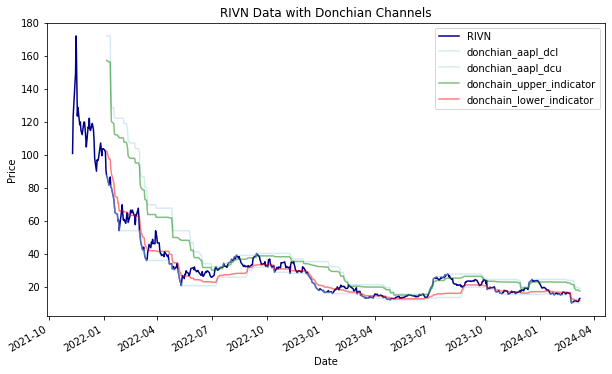

In [48]:
import matplotlib.pyplot as plt

# Plot the graph with customized colors and transparency
rivn_plot = rivn[['RIVN', 'RIVN_dcl', 'RIVN_dcm', 'RIVN_dcu','RIVN_upper_dcu', 'RIVN_lower_dcl']]
#rivnl_plot = aapl_plot[aapl_plot.index >= '2022-01-01']
rivn_plot['RIVN'].plot(color='darkblue', figsize=(10, 6), label='RIVN')
rivn_plot['RIVN_dcl'].plot(color = 'lightblue', label = 'donchian_aapl_dcl', alpha = 0.5)
rivn_plot['RIVN_dcu'].plot(color = 'lightblue', label = 'donchian_aapl_dcu', alpha = 0.5)
rivn_plot['RIVN_upper_dcu'].plot(color = 'green', label = 'donchain_upper_indicator', alpha = 0.5)
rivn_plot['RIVN_lower_dcl'].plot(color = 'red', label = 'donchain_lower_indicator',alpha = 0.5)

# Add legend
plt.legend()

# Add title and labels
plt.title('RIVN Data with Donchian Channels')
plt.xlabel('Date')
plt.ylabel('Price')

# Show the plot
plt.show()


In [49]:
results_strat3[1]

,open_date,close_date,open_price,close_price,gain,total,position
0,2022-02-01 00:00:00-05:00,2022-07-11 00:00:00-04:00,69.620003,29.930000,-0.570095,42.990519,Long
1,2022-07-11 00:00:00-04:00,2022-07-15 00:00:00-04:00,29.930000,31.600000,-0.055797,40.591783,Short
2,2022-07-15 00:00:00-04:00,2022-07-22 00:00:00-04:00,31.600000,32.480000,0.027848,41.722186,Long
3,2022-07-22 00:00:00-04:00,2022-07-29 00:00:00-04:00,32.480000,34.299999,-0.056034,39.384305,Short
4,2022-07-29 00:00:00-04:00,2022-08-17 00:00:00-04:00,34.299999,36.419998,0.061808,41.818552,Long
5,2022-08-17 00:00:00-04:00,2022-09-12 00:00:00-04:00,36.419998,38.740002,-0.063701,39.154654,Short
6,2022-09-12 00:00:00-04:00,2022-09-19 00:00:00-04:00,38.740002,37.939999,-0.020651,38.346088,Long
7,2022-09-19 00:00:00-04:00,2022-10-04 00:00:00-04:00,37.939999,36.299999,0.043226,40.003641,Short
8,2022-10-04 00:00:00-04:00,2023-02-21 00:00:00-05:00,36.299999,19.080000,-0.474380,21.026707,Long
9,2023-02-21 00:00:00-05:00,2023-03-03 00:00:00-05:00,19.080000,16.920000,0.113208,23.407089,Short


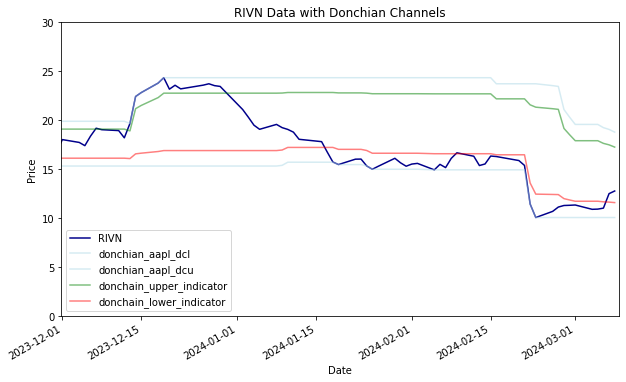

In [50]:
import matplotlib.pyplot as plt

# Plot the graph with customized colors and transparency
rivn_plot = rivn[['RIVN', 'RIVN_dcl', 'RIVN_dcm', 'RIVN_dcu','RIVN_upper_dcu', 'RIVN_lower_dcl']]
#rivnl_plot = aapl_plot[aapl_plot.index >= '2022-01-01']
rivn_plot['RIVN'].plot(color='darkblue', figsize=(10, 6), label='RIVN')
rivn_plot['RIVN_dcl'].plot(color = 'lightblue', label = 'donchian_aapl_dcl', alpha = 0.5)
rivn_plot['RIVN_dcu'].plot(color = 'lightblue', label = 'donchian_aapl_dcu', alpha = 0.5)
rivn_plot['RIVN_upper_dcu'].plot(color = 'green', label = 'donchain_upper_indicator', alpha = 0.5)
rivn_plot['RIVN_lower_dcl'].plot(color = 'red', label = 'donchain_lower_indicator',alpha = 0.5)

plt.xlim('2023-12-01', '2024-03-09')
plt.ylim(0,30)
# Add legend
plt.legend()

# Add title and labels
plt.title('RIVN Data with Donchian Channels')
plt.xlabel('Date')
plt.ylabel('Price')

# Show the plot
plt.show()

przyjrzeć się kilku caseom z bliska i uleprzyć warunki